# Matrix multiplication and networks of neurons

In this notebook, we'll go back to numpy and learn how to multiply matrices.

We'll apply it by building  our first model of a neuron, and a network of neurons.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

* `X` is a **matrix** (2-dimensional numpy array) with `N` rows and `T` columns


* In our example, the elements `X[i,t]` correspond to the activity of neurons.
    * `i` is an index of neurons (rows), it ranges between `0` and `N-1`
    * `t` is an index of time, it ranges between `0` and `T-1`
    * `X[i,t]=1` means that neuron `i` is active at time `t`, and `X[i,t]=0` means it is inactive.


* Initially the activity of our `N` neurons will be completely random.


* `f` is the last parameter we need to define `X`.
  The meaning of `f` is the probability that a neuron is active.

---
###### Task:
* Write the Python code to define `X` with the parameters:

            N = 100, T = 1000, f = 0.1

* The type of each element should be a float
---

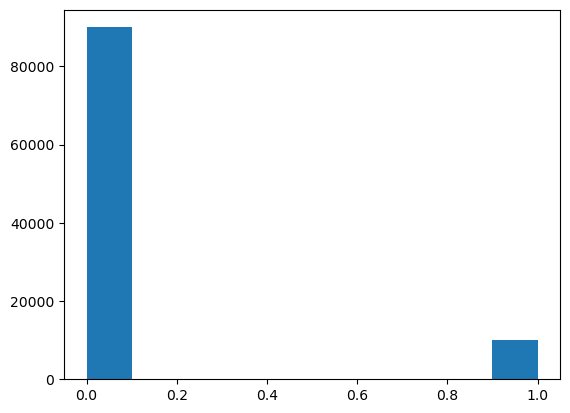

In [2]:
# your code here
N = 100
T = 1000
f = 0.1
X = np.random.rand(N,T)
X[X>(1-f)] = 1
X[X<=(1-f)] = 0
plt.hist(X.flatten())
plt.show()

* `w` is a **vector** (1-dimensional numpy array) with `N` rows and `1` column

* In our example, the elements `w` indicate the strength of the synaptic connections **from** all our neurons **to** a new neuron.

----
###### Task:
Write the Python code to define `w`

Each connection should be a standard normal random variable.

----

In [3]:
# your code here
w = np.random.randn(N,1)
w.shape


(100, 1)

* The **input** to our new neuron at time `t = 0` is:

        `y[0] = X[0,0]*w[0] + X[1,0]*w[1] + ... + X[N-1,0]*w[N-1]`
* If we look at all the time points `t = 1 , ... , T-1`, then `y` is also a vector.
* What is the length of the vector `y`?

`y` is the **product** of the matrix `X` and the vector `w`

### Let's review basic rules for multiplying matrices 

* What do the dimensions of two matrices have to be so that they can be multiplied?
* When two matrices can be multiplied, what are the dimensions of the result?
* What is the formula for multiplying matrices?

We will compute the product of `X` and `w` in three different ways, to understand how Python's built-in matrix product function works.

In [4]:
# matrix product, with two for-loops

y_v2 = np.zeros((T,1))
for t in range(T):
    for i in range(N):
        y_v2[t] = y_v2[t] + X[i,t]*w[i]

In [5]:
# matrix product, with one for-loop

y_v1 = np.zeros((T,1))
for t in range(T):
    y_v1[t] = np.sum(X[:,t]*w.T)

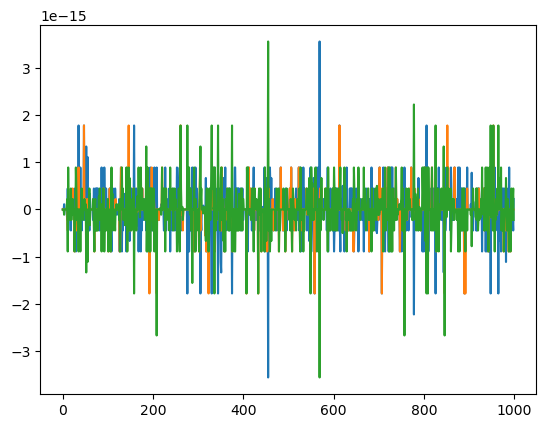

In [6]:
# matrix product, with no for-loops

y_v0 = np.matmul(X.T,w)
y_v0 = X.T @ w

plt.plot(y_v0-y_v1)
plt.plot(y_v0-y_v2)
plt.plot(y_v1-y_v2)

**Now the neurons that provide the inputs ("presynaptic") are the same ones that receive it ("postsynaptic")**

* This is called a **recurrent** network.
* There are many examples of recurrent networks in biology.
    * Networks of neurons
    * Networks of animals
    * Networks of genes
    * Networks of nutrient supply
    * Networks of networks
    

So instead of a weight *vector* from `N` neurons to `1` neuron,
we need a weight *matrix* from `N` neurons to (the same) `N` neurons.

----
###### Task:
Write the Python code to define a connectivity matrix `W`

Each connection should be a standard normal random variable.

Since neurons are almost never connected to themselves, we need to set the diagonal elements of `W` to 0.
    
There are many ways to do this. 
* for-loop
* use `np.eye()` to create a matrix with 1's on the diagonal and 0's everywhere else
* use `np.diag()` to extract the diagonal of a matrix or create a diagonal matrix

----

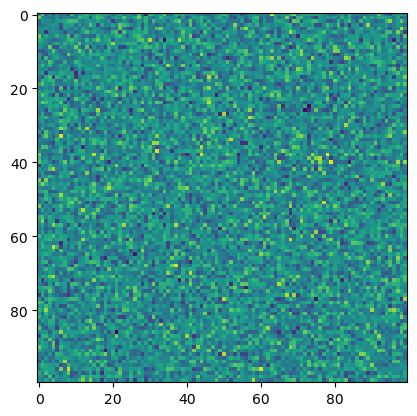

In [15]:
# your code here
N = 100
W = np.random.randn(N,N)
for i in range(N):
    W[i,i] = 0
W = W - W*np.eye(N)
W = W - np.diag(np.diag(W))

plt.imshow(W)


When we modeled a single neuron receiving inputs, `y` was the **input** to that neuron. 

The **input** to a neuron is not equal to its **output** (whether it is active or not)

We can convert the input to an output by setting the output to 1 if the input is positive, and to 0 if the input is negative.

----
###### Task:
Write the Python code to simulate the activity of a recurrent network 

Question: Do we have to use a for loop now? Why/Why not?

----

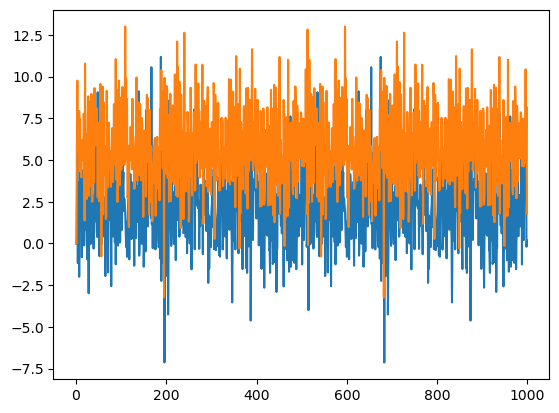

In [25]:
# your code here
def step(x):
    return (np.sign(x)+1)/2
    
y_out      = np.zeros((T,N))
y_out_0    = step(np.random.randn(1,N))
y_out[1,:] = y_out_0
y_in       = np.zeros((T,N))

for t in range(1,T):
    y_in[t,:] = y_out[t-1,:] @ W
    y_out[t,:] = step(y_in[t,:])
    
plt.plot(range(T),y_in[:,:2])
plt.show()